# STOCK PRICE PREDICTION IN PYTHON
This notebook will contain steps required to perform  simple analysis and predictions on stock prices. The dataset to be used can be gotten from .... which contains stock prices from 2009-05-22 to 2018-08-29. I will be taking the timeseries approach to forecast stock prices for the rest of year 2018 and early parts of year 2019.
The steps include:
1. Importing libraries
2. Loading the csv file
3. Working with dates
4. Exploratory data analysis
5. Preprocessing
6. Model Building

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

# Loading the GOOGL.csv file

In [2]:
train_data = pd.read_csv('GOOGL.csv')

In [3]:
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2335 non-null   object 
 1   Open       2335 non-null   float64
 2   High       2335 non-null   float64
 3   Low        2335 non-null   float64
 4   Close      2335 non-null   float64
 5   Adj Close  2335 non-null   float64
 6   Volume     2335 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 127.8+ KB


In [5]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2.335000e+03
mean,550.725409,555.136744,545.908515,550.662757,550.662757,3.764886e+06
std,278.136894,280.349025,275.855161,278.228484,278.228484,2.764696e+06
min,196.171173,199.524521,195.195190,196.946945,196.946945,5.206000e+05
25%,299.286773,301.759247,297.197204,299.144135,299.144135,1.734650e+06
50%,526.211182,532.780029,521.909973,527.767761,527.767761,3.250200e+06
75%,757.760010,763.745025,752.024994,758.524993,758.524993,4.891800e+06
max,1289.119995,1291.439941,1263.000000,1285.500000,1285.500000,2.961990e+07


Since we are predicting stock prices at the end of each day, our label(the values to be predicted) would be the Adj. Close column in the dataset.

# Working with date

From the train_data.info(), we can see that the train_data.Date has an object data type, so we need to convert it into a datetime object

In [6]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


Let's add a few more columns to train_data, containing the year, month and weekday name

In [7]:
train_data['Year'] = train_data.index.year
train_data['Month'] = train_data.index.month
train_data['Weekday Name'] = train_data.index.day_name()

In [8]:
train_data.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Weekday Name
Date,,,,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700,2009,5,Friday
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700,2009,5,Tuesday
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500,2009,5,Wednesday
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200,2009,5,Thursday
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100,2009,5,Friday


# EXPLORATORY DATA ANALYSIS

Now let's visualise the Adjusted Close

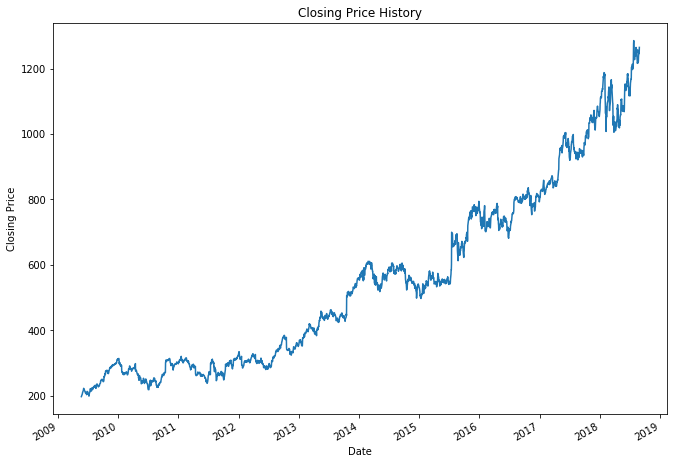

In [9]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

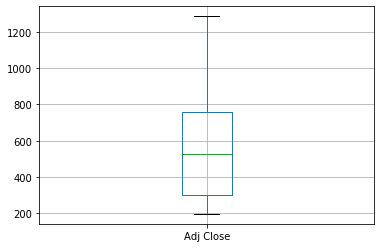

In [10]:
train_data.boxplot(column=['Adj Close'])

Visualising other columns in the dataset

<Figure size 1152x576 with 0 Axes>

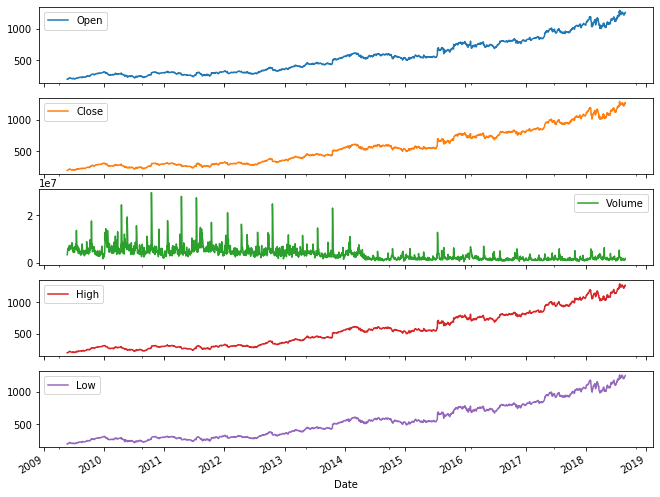

In [11]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

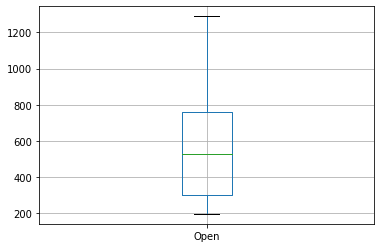

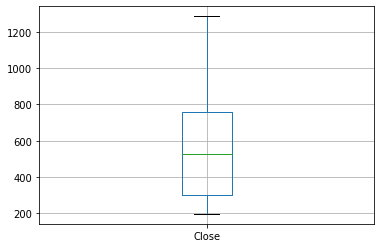

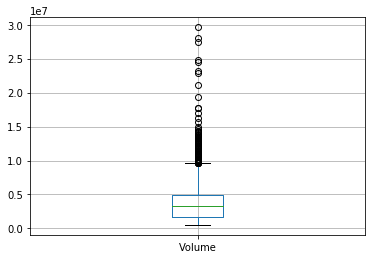

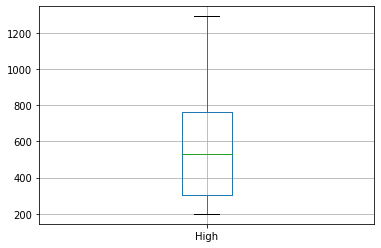

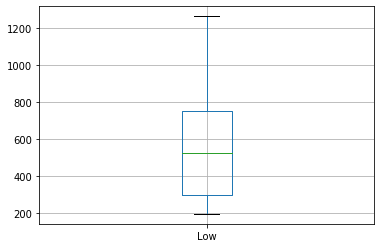

In [15]:
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
for i in cols:
    plt.subplots()
    axes = train_data.boxplot(column= [i])
plt.show()

Now let's visualise the correlation between these features of the dataset

In [16]:
corr = train_data.corr()

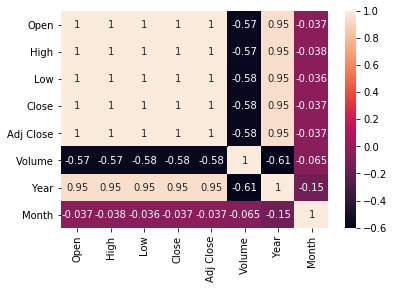

In [17]:
sns.heatmap(corr, annot=True)

Wow! from this, it shows that Adj. Close, Open, High, Close and Low have a very high correlation. So we have to drop these values.

# PREPROCESSING

# Adding new features to the dataset

Due to the high correlation, We have to add some features to the dataset. HL_PCT calculates for the high-low percentage for each day and the PCT_change calculatesfor the open-close percentage for each day. 

In [18]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0 # high-low percentage
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0 # open-close percentage

In [19]:
train_data.shape

(2335, 11)

# Checking for null values in the dataset

In [20]:
train_data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Year            0
Month           0
Weekday Name    0
HL_PCT          0
PCT_change      0
dtype: int64

# Picking the features we are working with

In [21]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

# Picking forecast data

Since we want to forecast the stock prices for days and months to come, we are going to shift the Adj. Close column to create room for the predictions of the days to come.

In [22]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

117


C:\Users\HP\.conda\envs\DataScience\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The output shows that we shifted the Adj. close 117 days up. to make room for 117 new predictions. the data shifted would be added to a new column called label and that would be our target values.

# Model building

# Import libraries

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

# Scaling the data

Now we scale the data between -1 and 1  in order to put all columns in the dataset in the same range. We will be using StandardScaler function from the preprocessing module of the sklearn library

In [24]:
scaler = StandardScaler()

In [25]:
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

# Picking data to be predicted

We have successfully scaled the data. Remember that we included a new column called Label to our dataset which contains forecasted out values. Also, we made room for 117 new predictions. So we are going to pick all rows in the dataset excluding the remaining 117 rows as our training data, and use the remaining 117 rows as the data to be predicted. 

In [26]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [27]:
X.shape

(2218, 4)

# Getting the target values

In [28]:
df.dropna(inplace=True)

C:\Users\HP\.conda\envs\DataScience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
y = np.array(df['label'])
y.shape

(2218,)

we are going to train the model with 80% of X

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now we are going to try different linear regression models and see which gives the best accuracy.

# Linear Regression

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
lr_confidence = lr.score(X_test, y_test)

In [33]:
lr_confidence

0.9558130106873121

# Random Forest

In [34]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
rf_confidence = rf.score(X_test, y_test)

In [36]:
rf_confidence

0.97370998505408

# Ridge

In [37]:
rg = Ridge()
rg.fit(X_train, y_train)

Ridge()

In [38]:
rg_confidence = rg.score(X_test, y_test)

In [39]:
rg_confidence

0.9558232815861608

# SVR

In [40]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [41]:
svr_confidence = svr.score(X_test, y_test)

In [42]:
svr_confidence

0.6725552349692898

Now that we have calculated the accuracy for 4 different models, let's visualise which models have the best accuracy.

In [44]:
names = ['Linear Regression', 'Random Forest', 'Ridge', 'SVR']
columns = ['model', 'accuracy']
scores = [lr_confidence, rf_confidence, rg_confidence, svr_confidence]
alg_vs_score = pd.DataFrame([[x, y] for x, y in zip(names, scores)], columns = columns)
alg_vs_score

,model,accuracy
0,Linear Regression,0.955813
1,Random Forest,0.973710
2,Ridge,0.955823
3,SVR,0.672555


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

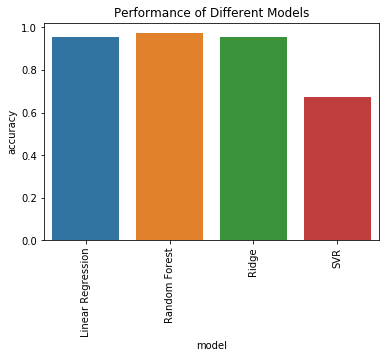

In [45]:
sns.barplot(data = alg_vs_score, x='model', y='accuracy' )
plt.title('Performance of Different Models')
plt.xticks(rotation='vertical')

The barplot shows that the RandomForestRegressor has the highest accuracy. Therefore, we would be using the model to predict our X_predict data.

# Adding the predicted data to the dataset

In [46]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day

In [48]:
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan

C:\Users\HP\.conda\envs\DataScience\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

C:\Users\HP\.conda\envs\DataScience\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


# Visualizing Adj Close and the Forecast data

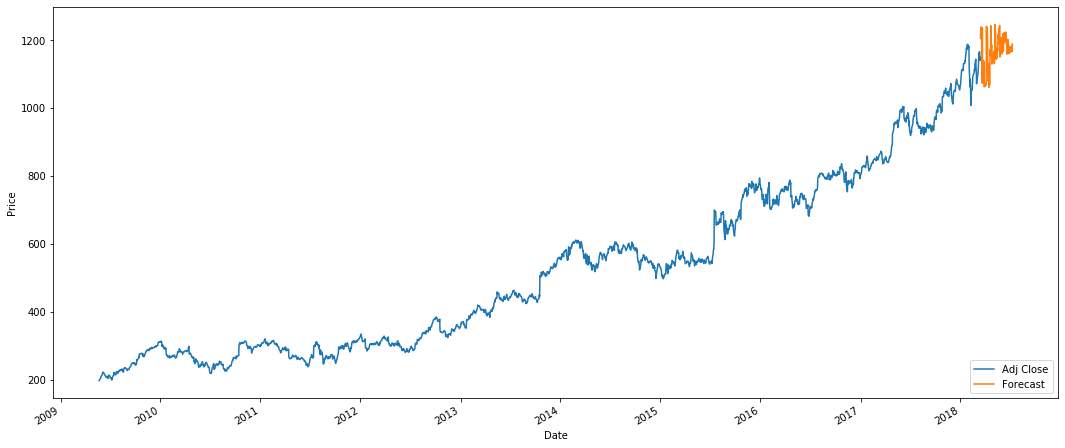

In [50]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

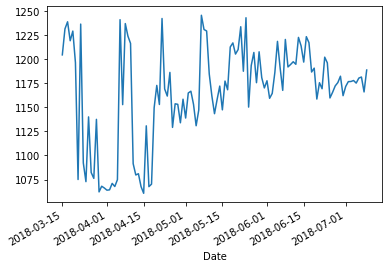

In [51]:
df['Forecast'].plot()